In [15]:
import os
import math
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams["svg.fonttype"]="none"

# d'apres http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

In [16]:
os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/_Entrance/")
#librairie pandas
#version
print(pd.__version__) # 0.23.0
#chargement de la première feuille de données
X = pd.read_excel("Xparams_entranceSelect.xlsx",sheet_name=0,header=0,index_col=0)
#Nous remarquons que :
#• Le fichier est un classeur Excel nommé « autos_acp_pour_python.xlsx » ;
#• Les données actives sont situées dans la première feuille (sheet_name = 0) ;
#• La première ligne correspond aux noms des variables (header = 0)
#• La première colonne aux identifiants des observations (index_col = 0).

0.22.0


## Importation des données actives

In [17]:
#dimension
print(X.shape) # (18, 6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print( X)

(58, 33)
        time     centroid           sd  c_min_sdlow  c_plus_sdHi  \
Label                                                              
1Aa       10   919.596573  1120.604440        384.5       2672.8   
1Ab1      50   816.423415  1361.964163        298.6       3486.8   
1Ab2      70   821.647028   862.324615        353.6       2192.2   
1B1      100   741.064445   866.594321        335.4       2123.9   
1B2      130   964.434002  1212.919419        443.2       3114.0   
1B3      170   645.613688   922.084507        251.6       2324.7   
1C1      220   995.515357  1444.004875        346.2       3481.1   
1C2      240   968.432050   977.434869        496.0       2589.7   
2Ab      290   940.847973   964.730310        574.8       2961.0   
2Ac1     330   728.290076   831.860043        308.7       2032.7   
2Ac2     380   734.915490   928.370923        287.9       2258.1   
2B1      420  1044.776426  1247.656342        464.1       3257.5   
2B2      470   975.407822  1086.376080 

## Préparation des données

In [18]:
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.19.1


In [19]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-1.74061089 -0.01248823 -0.05843546 ... -1.08950871 -0.55032879
  -1.22448613]
 [-1.67024642 -0.46971176  0.62737841 ... -0.98549994 -0.55032879
  -0.83426528]
 [-1.63506418 -0.44656272 -0.7923271  ... -0.98549994 -0.02563417
   1.116839  ]
 ...
 [ 1.47856388 -0.03403569 -0.83924187 ... -0.11060269 -0.55032879
  -0.44404442]
 [ 1.53133723 -1.15149818 -1.03590662 ...  0.48810321 -0.55032879
   1.116839  ]
 [ 1.58411059 -2.74020033 -0.89420881 ...  0.49538674 -0.55032879
  -0.44404442]]


In [20]:
#vérification - librairie numpy
import numpy
#moyenne
print("moyenne", numpy.mean(Z,axis=0))

#écart-type
print("ecart", numpy.std(Z,axis=0,ddof=0))

moyenne [-3.82835526e-18 -5.05342894e-16  2.25872960e-16 -4.82372762e-16
  5.24484670e-16 -1.75338671e-15 -4.67059341e-16  3.61396736e-15
  5.17426140e-17 -9.95372367e-17 -1.14850658e-16  2.06731184e-16
  1.83761052e-16  6.81447236e-16  3.06268421e-17  1.14850658e-17
 -2.91912088e-16 -1.91417763e-16  5.74253289e-17 -6.65176726e-17
 -1.53134210e-17 -8.61379933e-17 -9.95372367e-17  1.22507368e-16
  7.65671051e-18  1.37820789e-16 -1.41649145e-16 -3.82835526e-17
  1.22507368e-16 -4.59402631e-17  4.88115295e-17 -6.12536841e-17
 -1.42606233e-16]
ecart [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Analyse en composantes principales avec PCA de ‘’scikit-learn’’

In [21]:
# Il faut instancier l’objet PCA dans un premier temps, nous affichons ses propriétés.


#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [22]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6

33


In [23]:
# Valeurs propres et scree plot
#variance expliquée
print(acp.explained_variance_)

#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[9.53521362e+00 7.08605906e+00 4.95364365e+00 3.01736529e+00
 1.63854126e+00 1.19597587e+00 1.13123036e+00 8.87244703e-01
 7.28175614e-01 5.47874136e-01 4.87667008e-01 4.56334439e-01
 4.13939189e-01 3.59735474e-01 2.63526847e-01 1.94905841e-01
 1.48157397e-01 1.10425711e-01 9.59484174e-02 7.51736207e-02
 6.53848436e-02 5.11219795e-02 3.73091428e-02 3.16444526e-02
 2.25559590e-02 1.23338544e-02 1.10824173e-02 7.74701008e-03
 6.39641051e-03 2.49744458e-03 1.99853184e-03 1.31340604e-03
 4.24404456e-04]
[9.37081338e+00 6.96388563e+00 4.86823601e+00 2.96534175e+00
 1.61029055e+00 1.17535560e+00 1.11172638e+00 8.71947380e-01
 7.15620862e-01 5.38428030e-01 4.79258956e-01 4.48466604e-01
 4.06802306e-01 3.53533138e-01 2.58983281e-01 1.91545396e-01
 1.45602959e-01 1.08521820e-01 9.42941344e-02 7.38775238e-02
 6.42575187e-02 5.02405661e-02 3.66658817e-02 3.10988586e-02
 2.21670632e-02 1.21212017e-02 1.08913411e-02 7.61344094e-03
 6.28612757e-03 2.45438519e-03 1.96407439e-03 1.29076111e-03
 4.1708

In [24]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[2.83964042e-01 2.11026837e-01 1.47522303e-01 8.98588408e-02
 4.87966834e-02 3.56168363e-02 3.36886783e-02 2.64226479e-02
 2.16854807e-02 1.63160009e-02 1.45229987e-02 1.35898971e-02
 1.23273426e-02 1.07131254e-02 7.84797821e-03 5.80440593e-03
 4.41221088e-03 3.28853999e-03 2.85739801e-03 2.23871284e-03
 1.94719754e-03 1.52244140e-03 1.11108732e-03 9.42389656e-04
 6.71729187e-04 3.67309144e-04 3.30040639e-04 2.30710331e-04
 1.90488714e-04 7.43753089e-05 5.95174058e-05 3.91139731e-05
 1.26390042e-05]


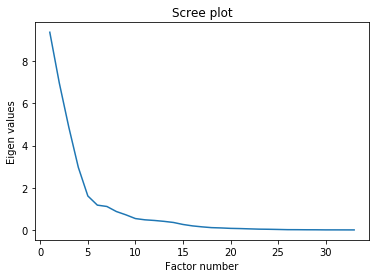

In [25]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
#plt.plot(np.arange(1,n+1),eigval) ???????? si n < p

plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

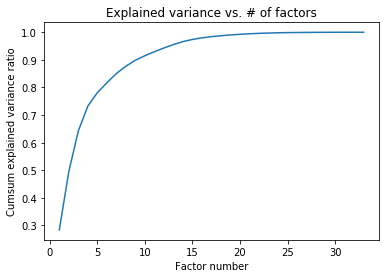

In [26]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [27]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
#bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [28]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Seuils  Val.Propre
0   4.088798    9.370813
1   3.088798    6.963886
2   2.588798    4.868236
3   2.255465    2.965342
4   2.005465    1.610291
5   1.805465    1.175356
6   1.638798    1.111726
7   1.495941    0.871947
8   1.370941    0.715621
9   1.259830    0.538428
10  1.159830    0.479259
11  1.068921    0.448467
12  0.985588    0.406802
13  0.908664    0.353533
14  0.837236    0.258983
15  0.770569    0.191545
16  0.708069    0.145603
17  0.649246    0.108522
18  0.593690    0.094294
19  0.541059    0.073878
20  0.491059    0.064258
21  0.443440    0.050241
22  0.397985    0.036666
23  0.354507    0.031099
24  0.312840    0.022167
25  0.272840    0.012121
26  0.234379    0.010891
27  0.197341    0.007613
28  0.161627    0.006286
29  0.127144    0.002454
30  0.093811    0.001964
31  0.061553    0.001291
32  0.030303    0.000417


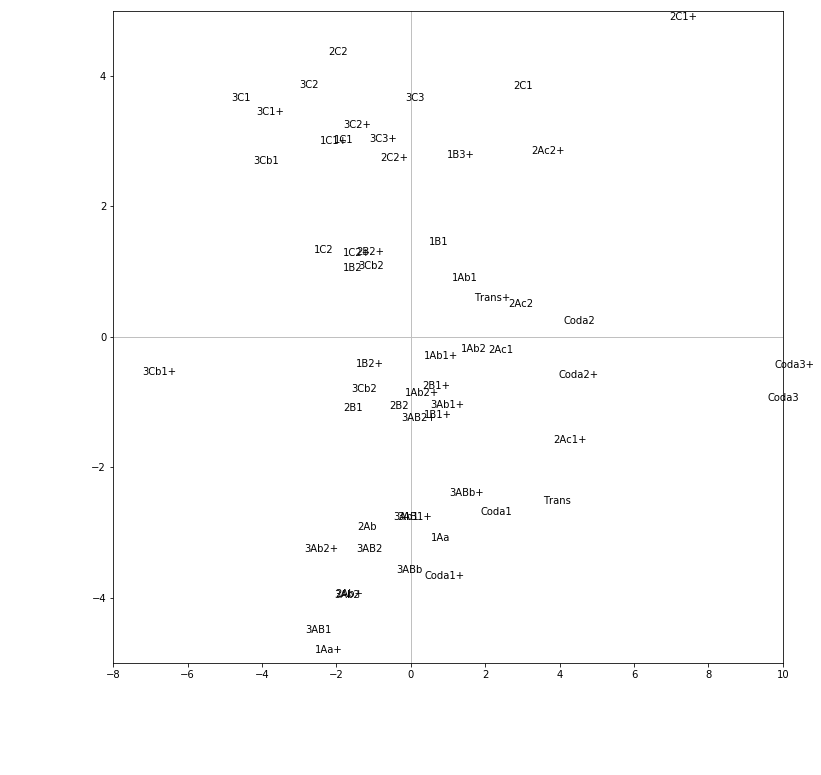

In [34]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,10) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-10, 10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-12, 12],color='silver',linestyle='-',linewidth=1)
#affichage
#plt.show()


dest = "entrance_ACP1.pdf"
   
plt.savefig(dest)

In [35]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

        ID         d_i
0      1Aa   38.532275
1     1Ab1   16.079238
2     1Ab2   11.904587
3      1B1   26.836433
4      1B2   11.638827
5      1B3   53.550401
6      1C1   43.084415
7      1C2   38.132972
8      2Ab   34.109005
9     2Ac1   14.981190
10    2Ac2   14.659441
11     2B1    9.240854
12     2B2    7.486999
13     2C1   31.421501
14     2C2   41.006599
15    3Ab1   16.663409
16    3Ab2   38.827669
17    3AB1   37.948938
18    3AB2   16.942870
19     3C1   72.105427
20     3C2   36.008527
21     3C3   26.030982
22    3ABb   25.049915
23    3Cb1   32.414332
24    3Cb2   18.657812
25   Trans   27.584628
26   Coda1   19.431756
27   Coda2   24.351801
28   Coda3  113.709423
29    1Aa+   50.946006
30   1Ab1+   18.435388
31   1Ab2+   42.178534
32    1B1+   16.583753
33    1B2+    5.752562
34    1B3+   26.263581
35    1C1+   79.620965
36    1C2+   22.051165
37    2Ab+   36.873891
38   2Ac1+   21.727165
39   2Ac2+   24.378685
40    2B1+    8.620465
41    2B2+   16.450244
42    2C1+ 

In [36]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      COS2_1    COS2_2      id
0   0.007360  0.253921     1Aa
1   0.075350  0.045160    1Ab1
2   0.149904  0.004598    1Ab2
3   0.008734  0.074090     1B1
4   0.288052  0.087398     1B2
5   0.079202  0.473543     1B3
6   0.098072  0.204712     1C1
7   0.176098  0.043306     1C2
8   0.061267  0.256980     2Ab
9   0.286435  0.004181    2Ac1
10  0.470059  0.014479    2Ac2
11  0.358090  0.141049     2B1
12  0.043854  0.164521     2B2
13  0.239410  0.460393     2C1
14  0.118795  0.454546     2C2
15  0.013797  0.473065    3Ab1
16  0.110161  0.411616    3Ab2
17  0.210410  0.541871    3AB1
18  0.125932  0.642169    3AB2
19  0.321354  0.181362     3C1
20  0.250001  0.402759     3C2
21  0.000692  0.502910     3C3
22  0.006076  0.522156    3ABb
23  0.553378  0.216418    3Cb1
24  0.107845  0.057650    3Cb2
25  0.459483  0.238904   Trans
26  0.179644  0.385907   Coda1
27  0.693341  0.001650   Coda2
28  0.809925  0.008520   Coda3
29  0.129562  0.461319    1Aa+
30  0.007260  0.006105   1Ab1+
31  0.00

In [37]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

       CTR_1     CTR_2      id
0   0.000522  0.024224     1Aa
1   0.002229  0.001798    1Ab1
2   0.003283  0.000136    1Ab2
3   0.000431  0.004923     1B1
4   0.006168  0.002518     1B2
5   0.007804  0.062783     1B3
6   0.007774  0.021837     1C1
7   0.012355  0.004089     1C2
8   0.003845  0.021701     2Ab
9   0.007895  0.000155    2Ac1
10  0.012678  0.000525    2Ac2
11  0.006088  0.003227     2B1
12  0.000604  0.003050     2B2
13  0.013841  0.035816     2C1
14  0.008963  0.046148     2C2
15  0.000423  0.019517    3Ab1
16  0.007870  0.039569    3Ab2
17  0.014691  0.050912    3AB1
18  0.003926  0.026937    3AB2
19  0.042633  0.032377     3C1
20  0.016563  0.035906     3C2
21  0.000033  0.032412     3C3
22  0.000280  0.032384    3ABb
23  0.033003  0.017368    3Cb1
24  0.003702  0.002663    3Cb2
25  0.023320  0.016316   Trans
26  0.006423  0.018566   Coda1
27  0.031065  0.000100   Coda2
28  0.169448  0.002399   Coda3
29  0.012145  0.058188    1Aa+
30  0.000246  0.000279   1Ab1+
31  0.00

In [39]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.02427837 -0.30072684 -0.16231463 ... -0.00443835 -0.08928092
   0.02139796]
 [-0.02062998 -0.04905919  0.11229103 ...  0.1250916   0.04992064
   0.04136666]
 [ 0.15965278  0.14752447  0.28616531 ...  0.08066436  0.16957953
   0.1177076 ]
 ...
 [-0.01373933 -0.30024402 -0.03476679 ... -0.01120275  0.01543371
   0.0422392 ]
 [ 0.01402129  0.16374196 -0.14264914 ... -0.00126522  0.01202032
  -0.00502529]
 [ 0.00920054 -0.49618308  0.64375003 ... -0.00890918  0.01699633
   0.00081993]]


In [41]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 7.43204315e-02 -5.44408199e-02  3.52259171e-01 ... -6.08897763e-04
   5.03745058e-04  1.87900015e-04]
 [-9.20578529e-01 -1.29463148e-01  3.25499153e-01 ... -1.33061783e-02
   5.88278407e-03 -1.01334038e-02]
 [-4.96874032e-01  2.96326765e-01  6.31397423e-01 ... -1.54079042e-03
  -5.12497894e-03  1.31471209e-02]
 ...
 [-1.35865865e-02  3.30106420e-01  1.77978491e-01 ... -4.96482219e-04
  -4.54559214e-05 -1.81949587e-04]
 [-2.73304825e-01  1.31736453e-01  3.74161613e-01 ...  6.83989337e-04
   4.31855836e-04  3.47111221e-04]
 [ 6.55029855e-02  1.09163208e-01  2.59710989e-01 ...  1.87195187e-03
  -1.80544533e-04  1.67452857e-05]]


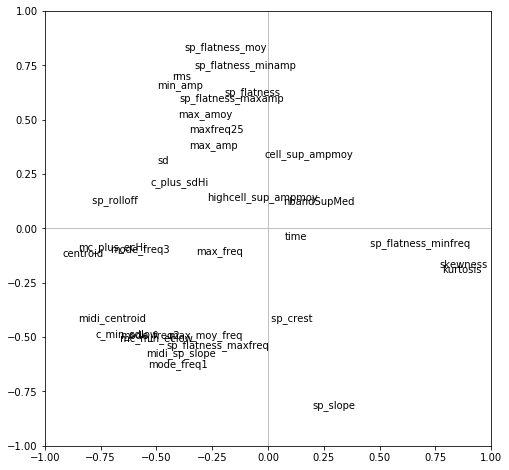

In [42]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)



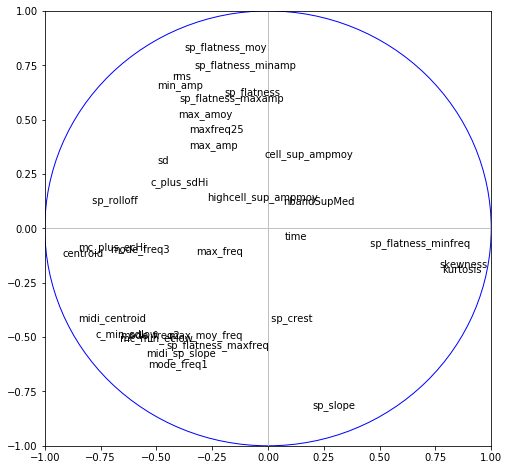

In [43]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage

dest = "entrance_ACP1pars.pdf"
   
plt.savefig(dest)

In [44]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      COS2_1    COS2_2                    id
0   0.005524  0.002964                  time
1   0.847465  0.016761              centroid
2   0.246884  0.087810                    sd
3   0.598155  0.248030           c_min_sdlow
4   0.275103  0.040838           c_plus_sdHi
5   0.721433  0.181864         midi_centroid
6   0.457176  0.267391          mc_min_eclow
7   0.723029  0.009660          mc_plus_ecHi
8   0.299566  0.343482         midi_sp_slope
9   0.038898  0.682701              sp_slope
10  0.591898  0.033118              skewness
11  0.607095  0.041444              kurtosis
12  0.642002  0.013800            sp_rolloff
13  0.037362  0.374658           sp_flatness
14  0.138883  0.671913       sp_flatness_moy
15  0.109716  0.548311    sp_flatness_minamp
16  0.197547  0.006583   sp_flatness_minfreq
17  0.158365  0.341491    sp_flatness_maxamp
18  0.207897  0.302627   sp_flatness_maxfreq
19  0.000001  0.184026              sp_crest
20  0.183364  0.470026                   rms
21  0.1255

In [45]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

           CTR_1     CTR_2                    id
0   5.894394e-04  0.000426                  time
1   9.043663e-02  0.002407              centroid
2   2.634604e-02  0.012609                    sd
3   6.383170e-02  0.035617           c_min_sdlow
4   2.935745e-02  0.005864           c_plus_sdHi
5   7.698727e-02  0.026115         midi_centroid
6   4.878727e-02  0.038397          mc_min_eclow
7   7.715759e-02  0.001387          mc_plus_ecHi
8   3.196798e-02  0.049323         midi_sp_slope
9   4.150943e-03  0.098034              sp_slope
10  6.316397e-02  0.004756              skewness
11  6.478569e-02  0.005951              kurtosis
12  6.851080e-02  0.001982            sp_rolloff
13  3.987014e-03  0.053800           sp_flatness
14  1.482076e-02  0.096485       sp_flatness_moy
15  1.170825e-02  0.078736    sp_flatness_minamp
16  2.108113e-02  0.000945   sp_flatness_minfreq
17  1.689977e-02  0.049037    sp_flatness_maxamp
18  2.218558e-02  0.043457   sp_flatness_maxfreq
19  1.396537e-07  0.